In [1]:
import sys
import os
import re
import numpy
import sys
sys.path.append('/work/westgroup/ChrisB/_04_thesis/rmg_thesis/RMG-Py/')
print(sys.path)

['/work/westgroup/ChrisB/_04_thesis/Thesis_repo/validation_data', '/work/westgroup/ChrisB/miniconda3/envs/rmg_thesis/lib/python37.zip', '/work/westgroup/ChrisB/miniconda3/envs/rmg_thesis/lib/python3.7', '/work/westgroup/ChrisB/miniconda3/envs/rmg_thesis/lib/python3.7/lib-dynload', '', '/home/blais.ch/.local/lib/python3.7/site-packages', '/work/westgroup/ChrisB/miniconda3/envs/rmg_thesis/lib/python3.7/site-packages', '/work/westgroup/ChrisB/miniconda3/envs/rmg_thesis/lib/python3.7/site-packages/chemprop-0.0.1-py3.7.egg', '/work/westgroup/ChrisB/miniconda3/envs/rmg_thesis/lib/python3.7/site-packages/descriptastorus-2.0.0.32-py3.7.egg', '/work/westgroup/ChrisB/miniconda3/envs/rmg_thesis/lib/python3.7/site-packages/IPython/extensions', '/home/blais.ch/.ipython', '/work/westgroup/ChrisB/_04_thesis/rmg_thesis/RMG-Py/']


In [2]:
import pickle

In [3]:
from rmgpy.species import Species

In [4]:
class SpeciesDat():
    def __init__(): 
        self.rmg_spec = Species().from_adjacency_list(adj_list)
        

In [5]:
streibel_path = os.path.join("./streibel_propane_2022", "energies.txt")

species_data = {}
with open(streibel_path, "r") as f:
    for num, line in enumerate(f.readlines()):
        # skip first: 
        if num == 0: 
            pass
        # Extract substrings between brackets
        # Using regex
        else:
            freq_start = line.index("[")
            freq_end = line.index("]") + 1
            
            freqs = list(line[freq_start:freq_end])
            dat = (line[0:freq_start] + line[freq_end:-1])
            dat = dat.split('\t')
            
            # if gas phase or transition state, don't bother
            if dat[0] == 'None' or "-" in dat[2]:
                pass
            else:
                new_spec = SpeciesDat(
                    metal = dat[0],
                    facet = dat[1],
                    name = dat[2],
                    energy = dat[3],
                    source = dat[5],
                    freq = freqs,
                )
                species_data[dat[2]] = new_spec
        
            
            

In [11]:
list(species_data.keys())

['H',
 'C',
 'CH3CHCH2',
 'O',
 'CH2CHCH2',
 'CH',
 'OH',
 'CCHCH2',
 'CHCC',
 'CHCHC',
 'CO',
 'COC',
 'O2',
 'CHCHCH2',
 'CHOHC',
 'CHC',
 'CCOH',
 'COOH',
 'COCCH',
 'CHCO']

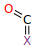

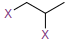

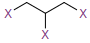

InvalidAdjacencyListError: Invalid valency for atom C (Cs) with 0 unpaired electrons, 0 pairs of electrons, 0 charge, and bonds [1.0,1.0,1.0].

In [23]:
# I need to do this by hand I think. tedious but it should be ok. 
# they have structures at https://www.catalysis-hub.org/publications/StreibelMicrokinetic2021, will use that
# easy ones first: 
# 'H'
spec = 'H'
adj = """
1 H u0 p0 c0 {2,S}
2 X u0 p0 c0 {1,S}
"""
species_data[spec].set_rmg_spec(adj)
display(species_data[spec].rmg_spec)

# 'C',
spec = 'C'
adj = """
1 C u0 p0 c0 {2,Q}
2 X u0 p0 c0 {1,Q}
"""
species_data[spec].set_rmg_spec(adj)
display(species_data[spec].rmg_spec)

# 'O',
spec = 'O'
adj = """
1 O u0 p2 c0 {2,D}
2 X u0 p0 c0 {1,D}
"""
species_data[spec].set_rmg_spec(adj)
display(species_data[spec].rmg_spec)

# 'CH',
spec = 'CH'
adj = """
1 C u0 p0 c0 {2,S} {3,T}
2 H u0 p0 c0 {1,S}
3 X u0 p0 c0 {1,T}
"""
species_data[spec].set_rmg_spec(adj)
display(species_data[spec].rmg_spec)

# 'OH',
spec = 'OH'
adj = """
1 O u0 p2 c0 {2,S} {3,S}
2 H u0 p0 c0 {1,S}
3 X u0 p0 c0 {1,S}
"""
species_data[spec].set_rmg_spec(adj)
display(species_data[spec].rmg_spec)

# 'CO',
spec = 'OH'
adj = """
1 C u0 p0 c0 {2,D} {3,D}
2 O u0 p2 c0 {1,D}
3 X u0 p0 c0 {1,D}
"""
species_data[spec].set_rmg_spec(adj)
display(species_data[spec].rmg_spec)


# 'CH3CHCH2',
spec = 'CH3CHCH2'
adj = """
1 C u0 p0 c0 {2,S} {4,S} {5,S} {10,S}
2 C u0 p0 c0 {1,S} {3,S} {6,S} {11,S}
3 C u0 p0 c0 {2,S} {7,S} {8,S} {9,S}
4 H u0 p0 c0 {1,S}
5 H u0 p0 c0 {1,S}
6 H u0 p0 c0 {2,S}
7 H u0 p0 c0 {3,S}
8 H u0 p0 c0 {3,S}
9 H u0 p0 c0 {3,S}
10 X u0 p0 c0 {1,S}
11 X u0 p0 c0 {2,S}
"""
species_data[spec].set_rmg_spec(adj)
display(species_data[spec].rmg_spec)

# 'CH2CHCH2',
spec = 'CH2CHCH2'
adj = """
1 C u0 p0 c0 {2,S} {4,S} {5,S} {10,S}
2 C u0 p0 c0 {1,S} {3,S} {6,S} {11,S}
3 C u0 p0 c0 {2,S} {7,S} {8,S} {9,S}
4 H u0 p0 c0 {1,S}
5 H u0 p0 c0 {1,S}
6 H u0 p0 c0 {2,S}
7 H u0 p0 c0 {3,S}
8 H u0 p0 c0 {3,S}
9 X u0 p0 c0 {3,S}
10 X u0 p0 c0 {1,S}
11 X u0 p0 c0 {2,S}
"""
species_data[spec].set_rmg_spec(adj)
display(species_data[spec].rmg_spec)

# 'CCHCH2',
# may not be able to represent, because the middle C is not bound to surf, 
# so it has unpaired electrons
# spec = 'CH2CHCH2'
# adj = """
# 1 C u0 p0 c0 {2,S} {4,S} {5,S} {10,S}
# 2 C u0 p0 c0 {1,S} {3,S} {6,S} {11,S}
# 3 C u0 p0 c0 {2,S} {7,S} {8,S} {9,S}
# 4 H u0 p0 c0 {1,S}
# 5 H u0 p0 c0 {1,S}
# 6 H u0 p0 c0 {2,S}
# 7 H u0 p0 c0 {3,S}
# 8 H u0 p0 c0 {3,S}
# 9 X u0 p0 c0 {3,S}
# 10 X u0 p0 c0 {1,S}
# 11 X u0 p0 c0 {2,S}
# """
# species_data[spec].set_rmg_spec(adj)
# display(species_data[spec].rmg_spec)

# 'CHCC',
spec = 'CHCC'
adj = """
1 C u0 p0 c0 {2,S} {,S} {5,S} {10,S}
2 C u0 p0 c0 {1,S} {3,S} {6,S} {11,S}
3 C u0 p0 c0 {2,S} {7,S} {8,S} {9,S}
4 H u0 p0 c0 {1,S}
9 X u0 p0 c0 {3,S}
10 X u0 p0 c0 {1,S}
11 X u0 p0 c0 {2,S}
"""
species_data[spec].set_rmg_spec(adj)
display(species_data[spec].rmg_spec)

# 'CHCHC',


# 'COC',


# 'O2',


# 'CHCHCH2',


# 'CHOHC',


# 'CHC',


# 'CCOH',


# 'COOH',


# 'COCCH',


# 'CHCO',